# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [23]:
def dna_complementary(seq, direction):
    #make sequence upper case
    seq= seq.upper()
    #initialize complementary string
    comp_seq = ""
    #complement dictionary
    complements = {"A":"T", "C":"G", "T":"A", "G":"C"}
    #iterate through each nucleottide in sequence
    for i in seq:
        if i in complements:
            #if character is nucleotide, add complement to complement string
            comp_seq += complements[i]
        else:
            #if character is not nucleotide, return error
            raise ValueError("Sequence is non-canonical")
    #check direction
    if direction == "reverse":
        #if direction is reverse, reverse characters in complement string
        comp_seq = comp_seq[::-1]
    return comp_seq


In [26]:
dna_complementary("ATCG#$%^TTT", direction="same")

ValueError: Sequence is non-canonical

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [64]:
def dna_rna(seq):
    #create sets of dna and rna nucleotides
    rna_nucleotides = set("UAGC")
    dna_nucleotides = set("TAGC")
    #check if seq is rna
    if set(seq) <= rna_nucleotides:
        return ("Input sequence is a RNA sequence")
    #check if seq is dna
    if set(seq) <= dna_nucleotides:
        seq = seq.replace("T", "U")
        return seq
    raise ValueError("Sequence is non-canonical")


In [65]:
dna_rna("ATCG")

'AUCG'

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [60]:
def rna_aa(seq):
    # Dictionary mapping amino acids to RNA codons
    genetic_code = {
        "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
        "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
        "AAU": "N", "AAC": "N",
        "GAU": "D", "GAC": "D",
        "UGU": "C", "UGC": "C",
        "CAA": "Q", "CAG": "Q",
        "GAA": "E", "GAG": "E",
        "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
        "CAU": "H", "CAC": "H",
        "AUU": "I", "AUC": "I", "AUA": "I",
        "UUA": "L", "UUG": "L", "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
        "AAA": "K", "AAG": "K",
        "AUG": "M",
        "UUU": "F", "UUC": "F",
        "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
        "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S", "AGU": "S", "AGC": "S",
        "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
        "UGG": "W",
        "UAU": "Y", "UAC": "Y",
        "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
        "UAA": "*", "UAG": "*", "UGA": "*"
    }
    aa_seq = ""
    for i in range(0, len(seq), 3):
        codon = seq[i:i+3]
        if codon in genetic_code:
            aa = genetic_code[codon]
            aa_seq += aa
        else:
            raise ValueError("Sequence is non-canonical")
    
    return aa_seq



## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [66]:
def dna_aa(seq, direction):
    #dna complement
    complement = dna_complementary(seq, direction)
    #dna to rna
    rna = dna_rna(complement)
    #rna to amino acid
    aa_seq = rna_aa(rna)
    return(aa_seq)

In [67]:
dna_aa("CGTCGCTACAAACCC", direction='same') 

'AAMFG'

## 1.5 Protein annotator

In [68]:
!pip install minotaor
!pip install dna_features_viewer

     ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 MB 262.6 kB/s eta 0:00:11
      --------------------------------------- 0.0/2.7 MB 217.9 kB/s eta 0:00:13
      --------------------------------------- 0.1/2.7 MB 272.3 kB/s eta 0:00:10
      --------------------------------------- 0.1/2.7 MB 272.3 kB/s eta 0:00:10
      --------------------------------------- 0.1/2.7 MB 272.3 kB/s eta 0:00:10
     - -------------------------------------- 0.1/2.7 MB 206.9 kB/s eta 0:00:13
     - -------------------------------------- 0.1/2.7 MB 261.9 kB/s eta 0:00:10
     - -------------------------------------- 0.1/2.7 MB 277.4 kB/s eta 0:00:10
     -- ------------------------------------- 0.2/2.7 MB 305.7 kB/s eta 0:00:09
     -- ------------------------------------- 0.2/2.7 MB 357.2 kB/s

  Obtaining dependency information for dna_features_viewer from https://files.pythonhosted.org/packages/4c/c9/560a99a02411b5a76660cb7eec99f85dc3ec80cad0711232cdb749e2f72a/dna_features_viewer-3.1.3-py3-none-any.whl.metadata


In [73]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence
protein = Seq("MGMACLTMTEMEGTSTSSIYQNGDISGNANSMKQIDPVLQVYLYHSLGKSEADYLTFPSGEYVAEEICIAASKACGITPVYHNMFALMSETERIWYPPNHVFHIDESTRHNVLYRIRFYFPRWYCSGSNRAYRHGISRGAEAPLLDDFVMSYLFAQWRHDFVHGWIKVPVTHETQEECLGMAVLDMMRIAKENDQTPLAIYNSISYKTFLPKCIRAKIQDYHILTRKRIRYRFRRFIQQFSQCKATARNLKLKYLINLETLQSAFYTEKFEVKEPGSGPSGEEIFATIIITGNGGIQWSRGKHKESETLTEQDLQLYCDFPNIIDVSIKQANQEGSNESRVVTIHKQDGKNLEIELSSLREALSFVSLIDGYYRLTADAHHYLCKEVAPPAVLENIQSNCHGPISMDFAISKLKKAGNQTGLYVLRCSPKDFNKYFLTFAVERENVIEYKHCLITKNENEEYNLSGTKKNFSSLKDLLNCYQMETVRSDNIIFQFTKCCPPKPKDKSNLLVFRTNGVSDVPTSPTLQRPTHMNQMVFHKIRNEDLIFNESLGQGTFTKIFKGVRREVGDYGQLHETEVLLKVLDKAHRNYSESFFEAASMMSKLSHKHLVLNYGVCVCGDENILVQEFVKFGSLDTYLKKNKNCINILWKLEVAKQLAWAMHFLEENTLIHGNVCAKNILLIREEDRKTGNPPFIKLSDPGISITVLPKDILQERIPWVPPECIENPKNLNLATDKWSFGTTLWEICSGGDKPLSALDSQRKLQFYEDRHQLPAPKWAELANLINNCMDYEPDFRPSFRAIIRDLNSLFTPDYELLTENDMLPNMRIGALGFSGAFEDRDPTQFEERHLKFLQQLGKGNFGSVEMCRYDPLQDNTGEVVAVKKLQHSTEEHLRDFEREIEILKSLQHDNIVKYKGVCYSAGRRNLKLIMEYLPYGSLRDYLQKHKERIDHIKLLQYTSQICKGMEYLGTKRYIHRDLATRNILVENENRVKIGDFGLTKVLPQDKEYYKVKEPGESPIFWYAPESLTESKFSVASDVWSFGVVLYELFTYIEKSKSPPAEFMRMIGNDKQGQMIVFHLIELLKNNGRLPRPDGCPDEIYMIMTECWNNNVNQRPSFRDLALRVDQIRDNMAG")
protein_record = SeqRecord(protein, id="example", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [74]:
protein_record

SeqRecord(seq=Seq('MGMACLTMTEMEGTSTSSIYQNGDISGNANSMKQIDPVLQVYLYHSLGKSEADY...MAG'), id='example', name='<unknown name>', description='<unknown description>', dbxrefs=[])

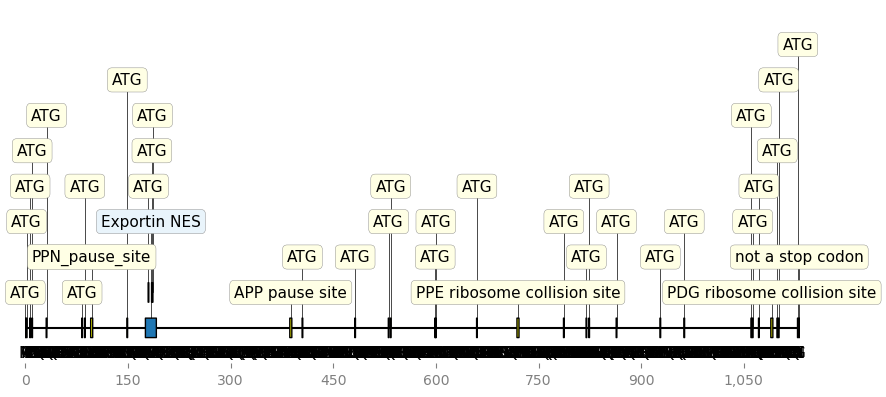

In [75]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

The protein annotation is for JAK2, a tyrosine kinase. The sequence has many ATG/start codons but no stop codon. The protein has a PPE ribosome collision site and a PDG ribosome collision site, I assume this is where two ribosomes may collide during translation as they move along the rna in both directions. There are also mutliple pause sites, where ribosomes tend to pause during translation.

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [81]:
from Bio import SeqIO
def extract_seqs(fastq_file_path):
    seqs = {}
    with open(fastq_file_path, "r") as fastq_file:
        for i in SeqIO.parse(fastq_file, "fastq"):
            # Check if all quality scores are >= Q10
            if all(q >= 10 for q in i.letter_annotations["phred_quality"]):
                seqs[i.id] = str(i.seq)

    return seqs


In [82]:
extract_seqs("sample10000.fastq")

{'ERR016162.31734339': 'AAGAATTTTTAAATTTCCATCTTGATTTCATTGTTGACCCCAAAATTATTCAGGAGTAGGTTATTTATTTTCCATGTATTTTCATGATTTTG',
 'ERR016162.11626500': 'GAATTATCGAATGGAATCGAAGAGAATCATCGAATGGACCCGAATGGAATCATCTAATGGAATGGAATGGAATAATCCATGGACTCGAATGC',
 'ERR016162.22472995': 'TTTATTTTTTAAATTATAATTTAAGTTCTAGGGCACATGTGCACAACGTGCAGGTTTGTTACATATGTATATATGTGCCATGTTGGTGTGCT',
 'ERR016162.15992012': 'CAAATGATACAGAAACCTTATGGAACCTGTAAGGTTAAATCATGCATTTCTGAAAGTAGTAATAATATTTACTTTACTTCCAGTGGGTTAAT',
 'ERR016162.21114782': 'TTCCAGTAAGGGTACCAAGACAATCTAATGGAGAAAGAATACTCTTTTCATCCCATGGTGTGGGACAAATAGAAATAGACATGCAAAGAAAA',
 'ERR016162.19132565': 'ATAAATATGGTACACCTAGTATGTCTAGTCAAAGACTCCTAACAAGGCAGAATGTGAACTTACAGTAAAGGCTTTCCAAGATGAGGAAACCA',
 'ERR016162.31848060': 'TTTTGGACACCGTGAACCAGCACCGGGCTGTGTCAGCCCAGCTCGAGGGGCCAGGGCAGAGGCAGGGTTCACGGAGACGCAGATTCTGCCAC',
 'ERR016162.34741020': 'AAAGTGAAAGTGCTGTCTATTTGATGCCAATTTATCATTTTAACTGCTTGCATTTTGCAACATGTAAACGACAGTAGCTGGTTTTCTATTGC',
 'ERR016162.27825684': 'GGTGTGTCCTGGGGGCTCCACCTT

In [184]:
from Bio import SeqIO
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = {}
        self.dna_complementary_seqs = {}
        self.rna_seqs = {}
        self.aa_seqs = {}
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        fasta_file_path = self.filepath
        seqs = {}
        with open(fasta_file_path, "r") as fastq_file:
            for i in SeqIO.parse(fastq_file, "fastq"):
                # Check if all quality scores are >= Q10
                if all(q >= 10 for q in i.letter_annotations["phred_quality"]):
                    seqs[i.id] = str(i.seq)
        self.dna_seqs = seqs

    
    def complementary_seqs(self, direction):
        if not self.dna_seqs:
            raise ValueError("No DNA sequences found.")
        #make a copy of dicitonary for complementary
        comp_seqs= self.dna_seqs
        #complement dictionary
        complements = {"A":"T", "C":"G", "T":"A", "G":"C"}
        #iterate through each sequence in dictionary
        for key in comp_seqs:
            comp_seq = ""
            for i in comp_seqs[key]:
                if i in complements:
                    #if character is nucleotide, add complement to complement string
                    comp_seq += complements[i]
                else:
                    #if character is not nucleotide, return error
                    raise ValueError("Sequence is non-canonical")
            comp_seqs[key] = comp_seq
            #check direction
            if direction == "reverse":
                #if direction is reverse, reverse characters in complement string
                comp_seqs[key] = comp_seq[::-1]
        self.dna_complementary_seqs=comp_seqs

    def rna_seq(self):
        if not self.dna_complementary_seqs:
            raise ValueError("No complementary DNA sequences found.") 
        
        rna_seqs = {}
        #create sets of dna and rna nucleotides
        rna_nucleotides = set("UAGC")
        dna_nucleotides = set("TAGC")
        for seq_id, seq in self.dna_complementary_seqs.items():
            #check if seq is rna
            if set(seq) <= rna_nucleotides:
                seqs[seq_id] = "Input sequence is a RNA sequence"
            #check if seq is dna
            elif set(seq) <= dna_nucleotides:
                rna_seq = seq.replace("T", "U")
                rna_seqs[seq_id] = rna_seq
            else:
                raise ValueError("Sequence is non-canonical")
        self.rna_seqs = rna_seqs
   
    def aa_seq(self):
        if not self.rna_seqs:
            raise ValueError("No RNA sequences found.") 
        
        aa_seqs = {}
        # Dictionary mapping amino acids to RNA codons
        genetic_code = {
            "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
            "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
            "AAU": "N", "AAC": "N",
            "GAU": "D", "GAC": "D",
            "UGU": "C", "UGC": "C",
            "CAA": "Q", "CAG": "Q",
            "GAA": "E", "GAG": "E",
            "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G",
            "CAU": "H", "CAC": "H",
            "AUU": "I", "AUC": "I", "AUA": "I",
            "UUA": "L", "UUG": "L", "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
            "AAA": "K", "AAG": "K",
            "AUG": "M",
            "UUU": "F", "UUC": "F",
            "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
            "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S", "AGU": "S", "AGC": "S",
            "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
            "UGG": "W",
            "UAU": "Y", "UAC": "Y",
            "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
            "UAA": "*", "UAG": "*", "UGA": "*"
        }
        #loop through sequences in dictionary
        for seq_id, seq in self.rna_seqs.items():
            aa_seq = ""
            seq=seq.upper()
            #loop through nucleotide in sequence
            for i in range(0, len(seq), 3):
                codon = seq[i:i+3]
                if codon in genetic_code:
                    aa = genetic_code[codon]
                    aa_seq += aa
            aa_seqs[seq_id] = aa_seq

        self.aa_seqs = aa_seqs

    def annot_aa_plot(self, seqid):
        if not self.aa_seqs:
            raise ValueError("No protein sequences found.")
        
        protein = Seq(self.aa_seqs[seqid])
        protein_record = SeqRecord(protein, id=seqid, annotations={"molecule_type": "protein"})

        protein_record = minotaor.annotate_record(protein_record)
        graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
        ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
        graphic_record.plot_sequence(ax)

In [185]:
test= Genome("sample10000.fastq")

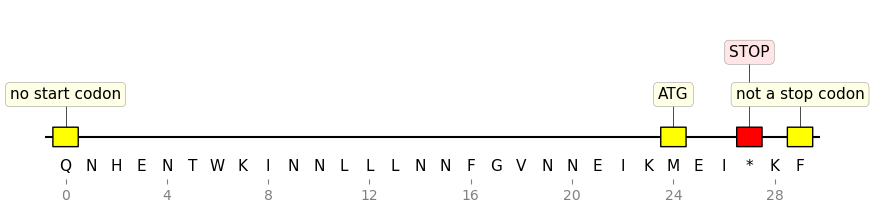

In [186]:
test.extract_seqs()
test.complementary_seqs("reverse")
test.rna_seq()
test.aa_seq()
test.annot_aa_plot("ERR016162.31734339")